In [1]:
import numpy as np
import tensorflow.keras.datasets.mnist as dataa
import matplotlib.pyplot as plt

In [2]:
def s(vector):
    plt.matshow(vector.reshape(28,28),cmap='gray')
    plt.show()

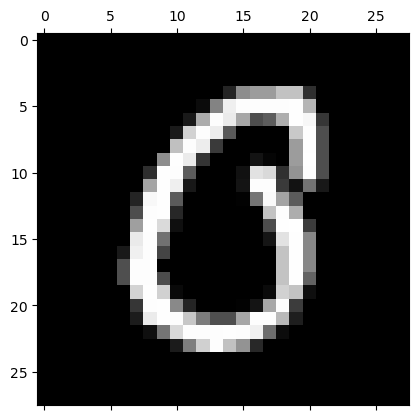

In [3]:
(train_images, train_labels), (test_images,test_labels)=dataa.load_data()
train_images=np.reshape(train_images,(60000,784))/255
test_images=np.reshape(test_images,(10000,784))/255
s(train_images[234])

In [4]:
def tanh(x):
    return 1/(1+np.exp(-x))
def dtanh(x):
    return np.exp(-x)/np.power(1+np.exp(-x),2)

In [5]:
class NN:
    def __init__(self,i_d,o_d,learning_rate):
        self.weights=np.random.rand(o_d,i_d)-0.5
        self.bias=np.random.rand(o_d,1)
        self.i=np.random.rand(i_d,1)
        self.o=np.random.rand(o_d,1)
        self.i_d=i_d
        self.o_d=o_d
        self.L=learning_rate
        self.wrong_indices=[]
        self.momentum=0
    def feed_forward(self,d):
        self.i=np.reshape(d,(784,1))
        self.o=np.matmul(self.weights,self.i)+self.bias
        return tanh(self.o)
    
    def weight_gradients(self,out,cost):
        w=np.matmul((out-cost)*dtanh(self.o),self.i.transpose())
        return w
    
    def bias_gradients(self,out,cost):
        b=(out-cost)*dtanh(self.o)
        return b
    
    def train(self,data,labels,batch_size):
        w_g=np.zeros((self.o_d,self.i_d))
        b_g=np.zeros((self.o_d,1))
        
        for i in range(len(data)):
            f=self.feed_forward(data[i])
            c=np.zeros((10,1))
            c[labels[i]]=1
            w_g=w_g+self.weight_gradients(f,c)
            b_g=b_g+self.bias_gradients(f,c)
            if i%batch_size==0:
                w_g/=batch_size
                b_g/=batch_size
                self.weights-=w_g*self.L
                self.bias-=b_g*self.L
                
                w_g=np.zeros((self.o_d,self.i_d))
                b_g=np.zeros((self.o_d,1))
                
    def label(self,test):
        results=self.feed_forward(test)
        print("Output Layer Activations:")
        for i in range(len(results)):
            print("Confidence its "+str(i)+":",results[i])
        mx=-10
        index=-1
        for i in range(len(results)):
            if results[i]>mx:
                mx=results[i]
                index=i
        #print(results)
        s(test)

        print("its a ",index," with ",mx, "confidence")
        
    def error(self,test,label):
        results=self.feed_forward(test)
        l=np.zeros((10,1))
        l[label]=1
        vectorOut=results-l
        
        print("Output Layer Activations:")
        for i in range(len(results)):
            print("Confidence its "+str(i)+":",results[i])
        print(l)
        mx=-10
        index=-1
        for i in range(len(results)):
            if results[i]>mx:
                mx=results[i]
                index=i
        #print(results)
        s(test)
        print(np.dot(vectorOut[0],vectorOut[0]))

    def calculate_accuracy(self,test,labels):
        self.wrong_indices=[]
        right=0
        total=0
        for i, s in enumerate(test): 
            results=self.feed_forward(s)
            if np.argmax(results) == labels[i]:
                right+=1
            else:
                self.wrong_indices.append(i)
            total+=1
        return (right/total)*100

In [6]:
neural_net=NN(784,10,1)

In [7]:
for i in range(10):
    neural_net.train(train_images,train_labels,10)

In [9]:
neural_net.calculate_accuracy(test_images,test_labels)

91.44

Output Layer Activations:
Confidence its 0: [2.55463379e-07]
Confidence its 1: [6.22971734e-06]
Confidence its 2: [0.05147807]
Confidence its 3: [2.40471263e-05]
Confidence its 4: [6.5870085e-06]
Confidence its 5: [3.32432828e-07]
Confidence its 6: [0.12582292]
Confidence its 7: [5.56425618e-12]
Confidence its 8: [1.40182107e-05]
Confidence its 9: [0.00041639]


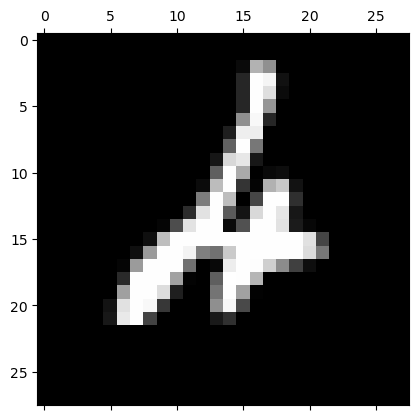

its a  6  with  [0.12582292] confidence


In [10]:
neural_net.label(test_images[neural_net.wrong_indices[16]])

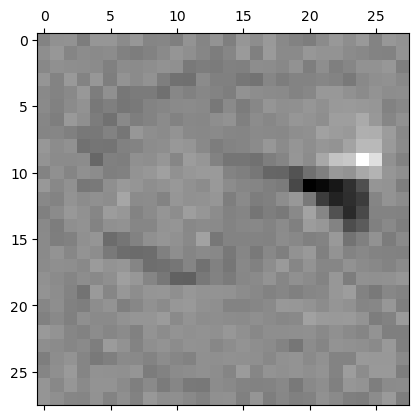

In [11]:
s(neural_net.weights[5])

In [12]:
a=np.array(
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0.3,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0.8999999999999999,0.6,0,0,0.8999999999999999,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0.6,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]] )

Output Layer Activations:
Confidence its 0: [0.0038841]
Confidence its 1: [0.1209549]
Confidence its 2: [1.02468607e-05]
Confidence its 3: [0.00285129]
Confidence its 4: [0.09031306]
Confidence its 5: [0.73129977]
Confidence its 6: [0.26055582]
Confidence its 7: [2.00410665e-10]
Confidence its 8: [3.04236747e-05]
Confidence its 9: [4.14505462e-08]


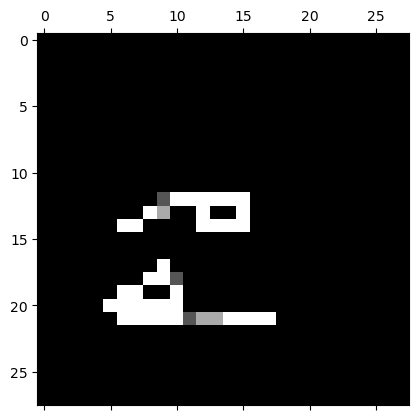

its a  5  with  [0.73129977] confidence


In [13]:
neural_net.label(a)

In [14]:
cat=np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0.8999999999999999,0.6,0.3,0.3,0.8999999999999999,0],[0,0,0,0,0,0.3,0.3,0,0,0.6,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0.8999999999999999,0.3,0.6,0,0,0,0.8999999999999999,0.3,0,0,0],[0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0.8999999999999999,0.8999999999999999,0.3,0.3,0.3,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0.3,0,0,0,0,0.8999999999999999,0,0,0],[0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0.3,0.8999999999999999,0.8999999999999999,0.3,0,0,0],[0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999],[0,0,0,0.3,0.8999999999999999,0.8999999999999999,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0.6,0.8999999999999999,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999],[0,0,0,0,0.3,0.8999999999999999,0,0,0,0.3,0.8999999999999999,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0.8999999999999999,0,0,0.6,0,0,0.8999999999999999,0.8999999999999999,0,0.8999999999999999],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.6,0,0.6,0,0,0.8999999999999999,0,0,0.8999999999999999,0,0.3,0.8999999999999999],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0.8999999999999999,0,0,0,0,0,0.8999999999999999,0,0.8999999999999999,0.3],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.3,0,0,0.8999999999999999,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0],[0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0.6,0.8999999999999999,0,0,0.8999999999999999,0,0,0,0.8999999999999999,0.3,0,0,0.8999999999999999,0],[0,0,0,0,0,0,0.8999999999999999,0,0,0,0.8999999999999999,0,0,0,0,0.8999999999999999,0,0,0.8999999999999999,0,0,0,0.8999999999999999,0,0,0,0.8999999999999999,0],[0,0,0,0,0,0,0.8999999999999999,0,0,0,0.8999999999999999,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0.8999999999999999,0,0,0,0.8999999999999999,0],[0,0,0,0,0.3,0.8999999999999999,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0.6,0.3,0.8999999999999999,0.3,0],[0,0,0,0.3,0.8999999999999999,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0.8999999999999999,0,0.8999999999999999,0,0,0],[0,0,0.3,0.8999999999999999,0.3,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0.8999999999999999,0,0,0,0,0],[0,0,0.8999999999999999,0.8999999999999999,0.6,0.6,0,0,0,0,0,0,0,0,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0.6,0.8999999999999999],[0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0.8999999999999999,0.3,0.6,0.8999999999999999,0,0.8999999999999999,0,0,0,0,0,0.8999999999999999,0.3,0.8999999999999999,0.8999999999999999,0.8999999999999999],[0,0,0,0,0,0,0,0.8999999999999999,0,0,0.8999999999999999,0.3,0.3,0,0,0.8999999999999999,0.8999999999999999,0.3,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]).transpose()

Output Layer Activations:
Confidence its 0: [2.68369183e-11]
Confidence its 1: [5.91490066e-14]
Confidence its 2: [0.40791847]
Confidence its 3: [6.32753729e-08]
Confidence its 4: [7.46647761e-09]
Confidence its 5: [1.8167736e-08]
Confidence its 6: [9.90380524e-11]
Confidence its 7: [4.05816952e-13]
Confidence its 8: [4.94345532e-15]
Confidence its 9: [1.30482368e-10]


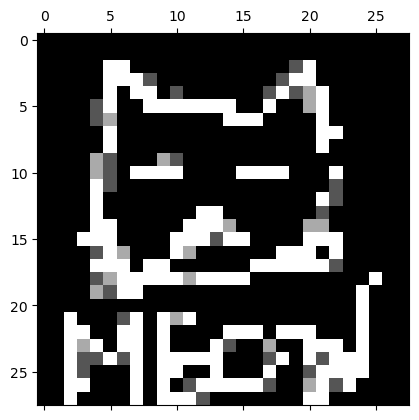

its a  2  with  [0.40791847] confidence


In [15]:
neural_net.label(cat)

Output Layer Activations:
Confidence its 0: [5.79142437e-11]
Confidence its 1: [0.99722702]
Confidence its 2: [0.00214372]
Confidence its 3: [0.00491865]
Confidence its 4: [1.6232248e-05]
Confidence its 5: [8.7395355e-05]
Confidence its 6: [2.92720855e-06]
Confidence its 7: [0.00644888]
Confidence its 8: [0.00031512]
Confidence its 9: [0.00088273]
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


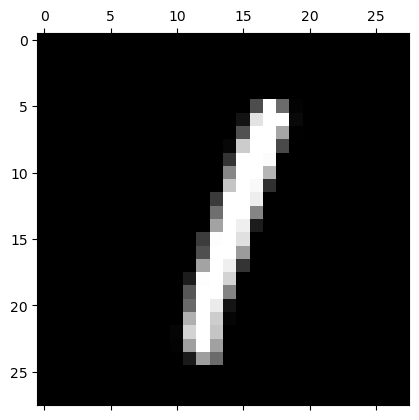

3.354059625483679e-21


In [16]:
neural_net.error(test_images[5],test_labels[5])

In [17]:
a=np.array(
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0.3,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0.8999999999999999,0.6,0,0,0.8999999999999999,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0.6,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]] )

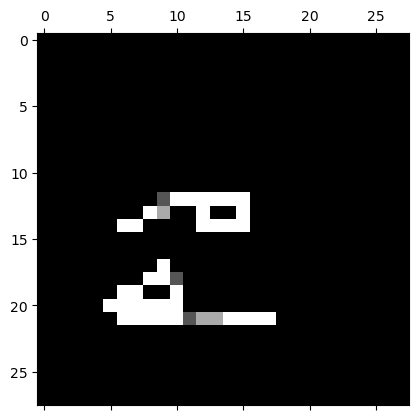

In [18]:
s(a)

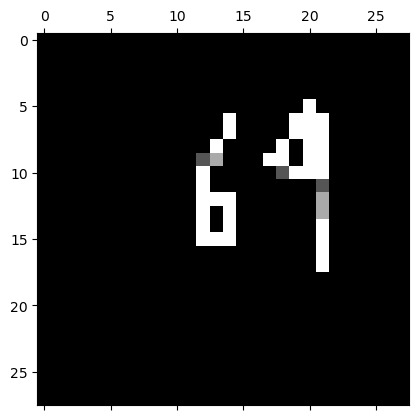

In [19]:
a=a.transpose()
s(a)

Output Layer Activations:
Confidence its 0: [0.00544747]
Confidence its 1: [0.40949176]
Confidence its 2: [2.02145591e-05]
Confidence its 3: [0.73657486]
Confidence its 4: [0.04379009]
Confidence its 5: [0.01627387]
Confidence its 6: [9.18130021e-08]
Confidence its 7: [0.00160938]
Confidence its 8: [0.00056033]
Confidence its 9: [0.03120067]


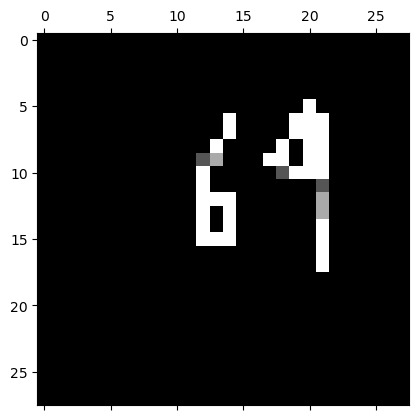

its a  3  with  [0.73657486] confidence


In [20]:
neural_net.label(a)

In [21]:
a=np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0.6,0.8999999999999999,0,0,0,0,0,0,0,0,0.3,0.8999999999999999,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0.6,0.6,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.3,0.3,0,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.6,0.3,0,0,0,0,0,0,0,0,0.8999999999999999,0.6,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0.6,0.6,0.3,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0.3,0.6,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0.6,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0.3,0.6,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.6,0.6,0,0,0,0,0.6,0.3,0.3,0.8999999999999999,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0.6,0.8999999999999999,0,0.3,0.8999999999999999,0.6,0.8999999999999999,0,0.3,0.6,0,0,0,0,0,0,0.8999999999999999,0.6,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.3,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0],[0,0,0,0,0,0,0,0.6,0.3,0.8999999999999999,0.8999999999999999,0,0,0,0.8999999999999999,0.3,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0.3,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0.3,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]).transpose()

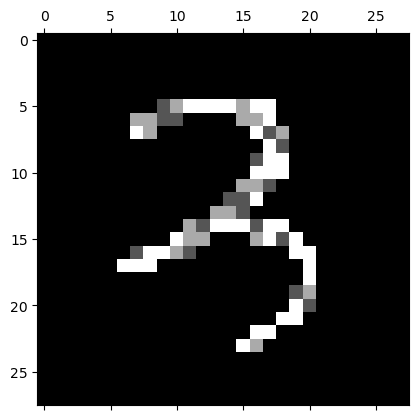

In [22]:
s(a)

Output Layer Activations:
Confidence its 0: [0.00017408]
Confidence its 1: [8.31499501e-06]
Confidence its 2: [0.09065059]
Confidence its 3: [0.05388455]
Confidence its 4: [0.1532724]
Confidence its 5: [0.000337]
Confidence its 6: [5.62492118e-07]
Confidence its 7: [4.27411107e-06]
Confidence its 8: [9.247611e-06]
Confidence its 9: [3.0444297e-08]


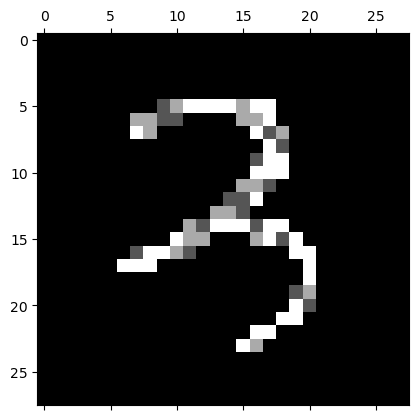

its a  4  with  [0.1532724] confidence


In [23]:
neural_net.label(a)

In [22]:
a=np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0.3,0.8999999999999999,0.6,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0.6,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0.6,0,0,0,0,0.6,0.8999999999999999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0.6,0.6,0,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0.8999999999999999,0.8999999999999999,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0.3,0.8999999999999999,0.6,0,0,0,0,0,0,0,0.6,0.8999999999999999,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0,0,0,0,0.3,0.8999999999999999,0.6,0.3,0.8999999999999999,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0],[0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0,0,0,0.6,0.6,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0,0,0,0],[0,0,0,0,0,0,0.6,0,0,0,0,0,0,0,0.3,0.6,0.3,0,0,0,0,0,0.8999999999999999,0.6,0,0,0,0],[0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0.3,0.8999999999999999,0.6,0,0,0,0,0.8999999999999999,0.3,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.6,0.6,0.8999999999999999,0.8999999999999999,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0.8999999999999999,0.6,0.8999999999999999,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]] ).transpose()

Output Layer Activations:
Confidence its 0: [0.00083463]
Confidence its 1: [3.45547304e-06]
Confidence its 2: [0.00396056]
Confidence its 3: [0.00016652]
Confidence its 4: [6.95097868e-06]
Confidence its 5: [0.75191654]
Confidence its 6: [0.0040899]
Confidence its 7: [2.09173363e-08]
Confidence its 8: [0.00523799]
Confidence its 9: [3.65314679e-06]


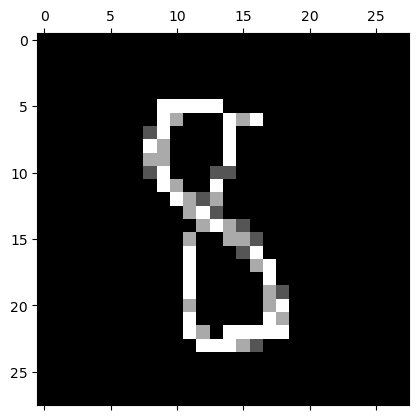

its a  5  with  [0.75191654] confidence


In [23]:
neural_net.label(a)

In [24]:
a=np.array(
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0.3,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0,0,0,0,0,0,0],[0,0,0,0,0.3,0.8999999999999999,0.8999999999999999,0,0,0.3,0.3,0.3,0.3,0.3,0.3,0.8999999999999999,0.3,0,0,0.3,0,0.8999999999999999,0,0,0,0,0,0],[0,0,0.3,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0],[0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0,0,0,0,0,0,0,0,0,0,0],[0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0,0,0,0,0,0,0,0,0,0],[0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0,0,0,0,0,0,0,0,0,0],[0,0,0,0.3,0.8999999999999999,0.3,0.8999999999999999,0.6,0.3,0.6,0.6,0.6,0.3,0.3,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0.3,0,0,0,0,0,0,0,0],[0,0,0,0,0,0.8999999999999999,0.6,0,0.3,0.3,0,0.3,0,0.3,0,0.3,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0.3,0,0,0,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.8999999999999999,0.6,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.3,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.6,0.3,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.8999999999999999,0.6,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.6,0.6,0.6,0.3,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]] ).transpose()

Output Layer Activations:
Confidence its 0: [1.73522046e-09]
Confidence its 1: [8.82758449e-07]
Confidence its 2: [0.00396592]
Confidence its 3: [0.96525067]
Confidence its 4: [8.2355724e-14]
Confidence its 5: [1.19772037e-08]
Confidence its 6: [1.12017407e-05]
Confidence its 7: [2.2042318e-15]
Confidence its 8: [5.95860255e-06]
Confidence its 9: [7.13995397e-10]


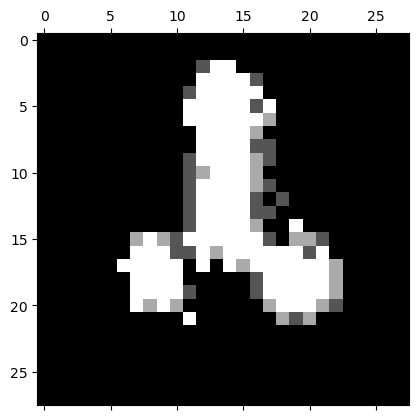

its a  3  with  [0.96525067] confidence


In [25]:
neural_net.label(a)